In [1]:
rm(list=ls())
library("dplyr")
library("plm")
library('huxtable')
library('showtext')
library('jtools')


In [2]:

setwd("/Users/jonathanold/Dropbox/ECON_140_Spring_2023/Section_Assignments/")

# Read in Data
welfare_data <- read.csv("welfare.csv")
head(welfare_data)


/Users/christinefang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
def extract_coords(address):
    base_url = f"https://maps.googleapis.com/maps/api/geocode/json?"
    params = {"address": address, "key":api_key}
    url_params = urlencode(params)
    
    url = f"{base_url}{url_params}"


    response = requests.get(url).json()
    response.keys()

    if response['status'] == 'OK':
        geometry = response['results'][0]['geometry']
        lat = geometry['location']['lat']
        lng = geometry['location']['lng']
        return (lat, lng)
    return {}



### gets distance (in km) between 2 lat,long points
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = np.radians(lon1)
    lon2 = np.radians(lon2)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
 
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)


In [6]:
GED_Data = pd.read_csv("../data/ged_data_india.csv")

### sample around 500 events
GED_Data = GED_Data.sample(frac = 0.1)

In [7]:
### only using adm_1 and adm_2 as address
df = GED_Data
df["location_descript1"] = df["adm_1"] + ", " + df["adm_2"]
df["location_descript2"] = df["adm_1"] + ", " + df["adm_2"] + ", " + df["where_description"]
df["location_descript3"] = df["adm_1"] + ", " + df["adm_2"] + ", " + df["where_coordinates"]
df["location_descript4"] = df["adm_1"] + ", " + df["adm_2"] + ", " + df["where_description"] + ", " + df["where_coordinates"]

for i in range(1,5):
    df[f"extract_coords{i}"] = df[f"location_descript{i}"].apply(lambda x: extract_coords(x))
    df[[f'lat_est{i}', f'lng_est{i}']] = df[f'extract_coords{i}'].apply(pd.Series)
    df[f'distance_actual_estimate{i}'] = distance(df[f'lat_est{i}'], df['latitude'], df[f'lng_est{i}'], df['longitude'])
    
df = df[["where_prec","distance_actual_estimate1", "distance_actual_estimate2", "distance_actual_estimate3", "distance_actual_estimate4", "latitude", "longitude"]]

df



,where_prec,distance_actual_estimate1,distance_actual_estimate2,distance_actual_estimate3,distance_actual_estimate4,latitude,longitude
2613,2,78.705310,7.785129,7.785129,7.785129,18.196037,80.977729
16935,1,8.562624,0.564656,0.564656,0.564656,25.670100,94.107700
16837,3,41.498215,41.498215,41.498215,41.498215,25.614000,88.126000
4680,2,7.844058,5.936529,0.778374,5.936529,33.765338,75.204017
14978,2,6.428486,3.641987,8.116234,3.641987,33.039451,75.655765
...,...,...,...,...,...,...,...
2237,3,52.148214,723.718953,52.148214,0.542137,18.394752,81.661966
15279,3,5.912907,14.817802,5.912907,14.817802,33.250000,74.250000
10886,3,407.265901,407.265901,407.265901,327.480942,27.500000,95.000000
8830,2,24.135126,10.974016,10.974016,10.974016,33.307624,74.557540


In [8]:
df1 = df.groupby('where_prec').mean().dropna()
df1

,distance_actual_estimate1,distance_actual_estimate2,distance_actual_estimate3,distance_actual_estimate4,latitude,longitude
where_prec,,,,,,
1,26.676572,40.439344,10.020412,42.156887,29.794300,78.886613
2,31.514372,27.587818,13.589005,60.404526,28.816999,78.844558
3,31.140683,78.466429,30.572379,39.372637,28.291473,81.719294
5,34.053126,62.255779,24.659199,73.918898,32.082285,76.275791


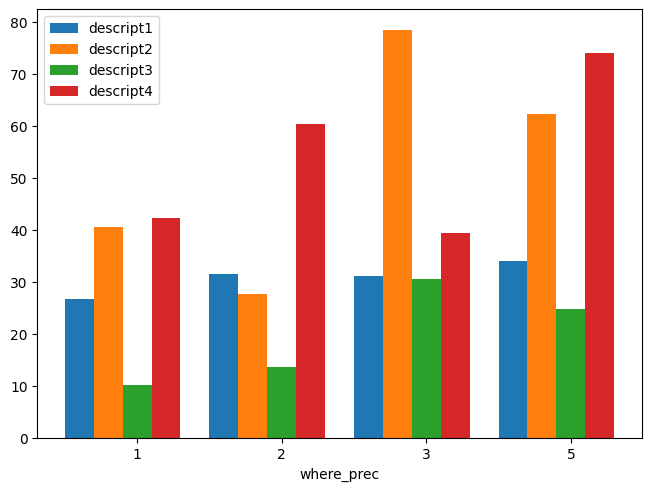

In [9]:
plt.subplots(layout='constrained')

x = np.arange(4) 
width = 0.2
plt.bar(x-0.4, df1['distance_actual_estimate1'], width) 
plt.bar(x-0.2, df1['distance_actual_estimate2'], width)
plt.bar(x, df1['distance_actual_estimate3'], width) 
plt.bar(x+0.2, df1['distance_actual_estimate4'], width) 
plt.legend(["descript1", "descript2", "descript3", "descript4"]) 
plt.xlabel("where_prec") 

plt.xticks(x, ['1', '2', '3', '5']) 
plt.show() 
